In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod600 ~/.kaggle/kaggle.json

/bin/bash: line 1: chmod600: command not found


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os, random
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud
import time
from tensorflow import keras
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

input_path = '/content/ecommerce-events-history-in-cosmetics-shop'
for dirname, _, filenames in os.walk(input_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
!kaggle datasets download -d mkechinov/ecommerce-events-history-in-cosmetics-shop

Dataset URL: https://www.kaggle.com/datasets/mkechinov/ecommerce-events-history-in-cosmetics-shop
License(s): copyright-authors
100% 429M/430M [00:27<00:00, 22.0MB/s]
100% 430M/430M [00:27<00:00, 16.4MB/s]


In [ ]:
! unzip ecommerce-events-history-in-cosmetics-shop.zip

Archive:  ecommerce-events-history-in-cosmetics-shop.zip
  inflating: 2019-Dec.csv            
  inflating: 2019-Nov.csv            
  inflating: 2019-Oct.csv            
  inflating: 2020-Feb.csv            
  inflating: 2020-Jan.csv            


In [ ]:
path = '/content/ecommerce-events-history-in-cosmetics-shop'
name = '2019-Oct'
data = pd.read_csv(f'{path}/{name}.csv')

In [ ]:
data.head(14)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03 UTC,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07 UTC,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01 00:00:07 UTC,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01 00:00:15 UTC,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
5,2019-10-01 00:00:16 UTC,cart,5857269,1487580005134238553,NaN,runail,2.62,430174032,73dea1e7-664e-43f4-8b30-d32b9d5af04f
6,2019-10-01 00:00:19 UTC,cart,5739055,1487580008246412266,NaN,kapous,4.75,377667011,81326ac6-daa4-4f0a-b488-fd0956a78733
7,2019-10-01 00:00:24 UTC,cart,5825598,1487580009445982239,NaN,NaN,0.56,467916806,2f5b5546-b8cb-9ee7-7ecd-84276f8ef486
8,2019-10-01 00:00:25 UTC,cart,5698989,1487580006317032337,NaN,NaN,1.27,385985999,d30965e8-1101-44ab-b45d-cc1bb9fae694
9,2019-10-01 00:00:26 UTC,view,5875317,2029082628195353599,NaN,NaN,1.59,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe


In [ ]:
# Show duplicates
data[data.duplicated(keep=False)]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
12,2019-10-01 00:00:30 UTC,remove_from_cart,5809103,1487580013522845895,NaN,irisk,0.60,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
13,2019-10-01 00:00:30 UTC,remove_from_cart,5809103,1487580013522845895,NaN,irisk,0.60,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
29,2019-10-01 00:01:05 UTC,remove_from_cart,5858981,1487580007634043851,NaN,de.lux,0.79,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
30,2019-10-01 00:01:05 UTC,remove_from_cart,5858981,1487580007634043851,NaN,de.lux,0.79,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
34,2019-10-01 00:01:07 UTC,remove_from_cart,5312,1487580009471148064,NaN,runail,1.27,467916806,2f5b5546-b8cb-9ee7-7ecd-84276f8ef486
...,...,...,...,...,...,...,...,...,...
4102232,2019-10-31 23:56:18 UTC,remove_from_cart,5834736,1487580009445982239,NaN,NaN,3.02,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
4102244,2019-10-31 23:56:46 UTC,remove_from_cart,5776516,1487580009445982239,NaN,NaN,7.14,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
4102246,2019-10-31 23:56:46 UTC,remove_from_cart,5776516,1487580009445982239,NaN,NaN,7.14,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
4102249,2019-10-31 23:56:52 UTC,remove_from_cart,5834737,1487580009445982239,NaN,NaN,1.98,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb


In [ ]:
# Copy to new dataframe to avoiding from adjusting the original dataframe
raw_data = data.copy()
print('Copy successfully')

Copy successfully


In [ ]:
# Drop duplicates
data = data.drop_duplicates()

In [ ]:
# Check duplicates
data[data.duplicated(keep=False)]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session


In [ ]:
# Show dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3889128 entries, 0 to 4102282
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 296.7+ MB


In [ ]:

# Summarize the training set
data.describe()

,product_id,category_id,price,user_id
count,3.889128e+06,3.889128e+06,3.889128e+06,3.889128e+06
mean,5.466216e+06,1.545765e+18,8.725351e+00,5.016975e+08
std,1.326391e+06,1.565820e+17,1.949236e+01,8.196493e+07
min,3.752000e+03,1.487580e+18,-7.937000e+01,4.103071e+06
25%,5.723488e+06,1.487580e+18,2.220000e+00,4.697598e+08
50%,5.809131e+06,1.487580e+18,4.110000e+00,5.396840e+08
75%,5.850498e+06,1.487580e+18,7.140000e+00,5.575529e+08
max,5.900470e+06,2.195085e+18,3.076000e+02,5.662808e+08


In [ ]:
data.count()

event_time       3889128
event_type       3889128
product_id       3889128
category_id      3889128
category_code      65379
brand            2317814
price            3889128
user_id          3889128
user_session     3888554
dtype: int64

In [ ]:
# Count null values
data.isnull().sum()

event_time             0
event_type             0
product_id             0
category_id            0
category_code    3823749
brand            1571314
price                  0
user_id                0
user_session         574
dtype: int64

In [ ]:
num_users = data['user_id'].nunique()
num_products = data['product_id'].nunique()
num_categories = data['category_id'].nunique()
num_taxonomies = data['category_code'].nunique()
num_brands = data['brand'].nunique()
print('Total number of users: ',num_users)
print('Total number of products: ', num_products)
print('Total number of categories: ', num_categories)
print('Total number of taxonomies: ', num_taxonomies)
print('Total number of brands: ', num_brands)

Total number of users:  399664
Total number of products:  41899
Total number of categories:  490
Total number of taxonomies:  11
Total number of brands:  240


In [ ]:
# PIPE 1
# Split by the first period (n=1)
data[['main_category', 'sub_category']] = data['category_code'].str.split('.', n=1, expand=True)
print('Splitted successfully.')
# Rearrange the columns
data = data.drop(columns=['category_code'])
new_order = ['event_time', 'event_type', 'product_id', 'category_id', 'main_category', 'sub_category', 'brand', 'price', 'user_id', 'user_session']
data = data[new_order]
print('Rearranged successfully.')
data.head(10)


Splitted successfully.
Rearranged successfully.


,event_time,event_type,product_id,category_id,main_category,sub_category,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,cart,5773203,1487580005134238553,NaN,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03 UTC,cart,5773353,1487580005134238553,NaN,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07 UTC,cart,5881589,2151191071051219817,NaN,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01 00:00:07 UTC,cart,5723490,1487580005134238553,NaN,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01 00:00:15 UTC,cart,5881449,1487580013522845895,NaN,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
5,2019-10-01 00:00:16 UTC,cart,5857269,1487580005134238553,NaN,NaN,runail,2.62,430174032,73dea1e7-664e-43f4-8b30-d32b9d5af04f
6,2019-10-01 00:00:19 UTC,cart,5739055,1487580008246412266,NaN,NaN,kapous,4.75,377667011,81326ac6-daa4-4f0a-b488-fd0956a78733
7,2019-10-01 00:00:24 UTC,cart,5825598,1487580009445982239,NaN,NaN,NaN,0.56,467916806,2f5b5546-b8cb-9ee7-7ecd-84276f8ef486
8,2019-10-01 00:00:25 UTC,cart,5698989,1487580006317032337,NaN,NaN,NaN,1.27,385985999,d30965e8-1101-44ab-b45d-cc1bb9fae694
9,2019-10-01 00:00:26 UTC,view,5875317,2029082628195353599,NaN,NaN,NaN,1.59,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe


In [ ]:
# Donut chart of main_category
mainCat_values = data.groupby('main_category')['product_id'].nunique().sort_values(ascending=False)
mainCat_names = mainCat_values.index
print(mainCat_values)
# Pie chart for main-categories
print('Number of main-categories: ', len(mainCat_names))
fig = px.pie(names=mainCat_names, values=mainCat_values, hole=0.3)
fig.update_layout({"title":{"text":"Main category distribution", "x":0.50}})
fig.show()


main_category
stationery     136
appliances     112
furniture       55
accessories     54
apparel         51
sport            1
Name: product_id, dtype: int64
Number of main-categories:  6


In [ ]:
subCat_values = data.groupby('sub_category')['product_id'].nunique().sort_values(ascending=False)
subCat_names = subCat_values.index
print(subCat_values)
# Pie chart for sub-categories
print('Number of sub-categories: ', len(subCat_names))

# # Create a new array of sub-category values with the summed value of sub-categories not in top 10
other_value = subCat_values[10:].sum()
subCat_names_with_other = np.append(subCat_names[:10], 'Other')
subCat_values_with_other  = np.append(subCat_values[:10], other_value)

fig = px.pie(names=subCat_names_with_other , values=subCat_values_with_other , hole=0.3)
fig.update_layout({"title":{"text":"Sub category distribution", "x":0.50}})
fig.show()


sub_category
cartrige                       136
environment.vacuum              82
glove                           51
bathroom.bath                   48
bag                             38
environment.air_conditioner     22
cosmetic_bag                    16
personal.hair_cutter             8
living_room.cabinet              5
living_room.chair                2
diving                           1
Name: product_id, dtype: int64
Number of sub-categories:  11


In [ ]:
# Is there any pair of main-categories has the same sub-category?

# Group main categories by sub-category and count the occurrences
main_cat_counts = data.groupby(['sub_category', 'main_category']).size().reset_index(name='count')

# Find pairs of main categories with the same sub-category
duplicate_pairs = main_cat_counts[main_cat_counts.duplicated(subset='sub_category', keep=False)]

# Display duplicate pairs
duplicate_pairs


,sub_category,main_category,count


In [ ]:
# Create data of main and sub categories with counts of products
category_counts = data.drop_duplicates(subset='product_id').groupby(['main_category', 'sub_category']).size().reset_index(name='count')

# Treemap plot
fig = px.treemap(category_counts, path=[px.Constant("all"), 'main_category', 'sub_category'], values='count',
                  color='count', hover_data=['count'],
                  color_continuous_scale='YlGnBu',)
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()


In [ ]:
# There are many products have no code, the percentage are:
no_categoryCode = data.drop_duplicates(subset='product_id')['main_category'].isna().sum()
have_categoryCode = category_counts['count'].sum()
print('Percentage of products have category_code: {0:.2f}%'.format(100*have_categoryCode/(have_categoryCode+no_categoryCode)))
print('Percentage of products have NO category_code: {0:.2f}%'.format(100*no_categoryCode/(have_categoryCode+no_categoryCode)))


Percentage of products have category_code: 0.98%
Percentage of products have NO category_code: 99.02%


In [ ]:
catId_data = data.drop_duplicates(subset='product_id').groupby(['category_id'])

# Count for inconsistent id and code
non_consistent = 0
for cat_id, group in catId_data:
    unique_codes = group['sub_category'].unique() # since sub-categories reflect catergory codes

    if len(unique_codes) > 1:
        print(f"For category_id {cat_id}, multiple category_codes exist: {unique_codes}")
        non_consistent+=1

print(f"Found {non_consistent} inconsistent category_id and category_code")


Found 0 inconsistent category_id and category_code


In [ ]:
#zero price
zero_price = data[data['price']==0]
zero_price.head(10)


,event_time,event_type,product_id,category_id,main_category,sub_category,brand,price,user_id,user_session
2454,2019-10-01 02:05:17 UTC,view,5892084,1597770225539875791,NaN,NaN,NaN,0.0,555458569,c048be2f-547d-4add-9bc6-09aa1e7ae9de
2614,2019-10-01 02:15:41 UTC,view,5892052,1487580010377117763,NaN,NaN,NaN,0.0,555455025,320f6021-30ac-4a58-ae17-bac1cc32aac3
5686,2019-10-01 04:25:00 UTC,view,5873432,2007399943458784057,apparel,glove,NaN,0.0,500054739,701220b4-45b4-4028-bcc3-5d77480253ff
6086,2019-10-01 04:33:15 UTC,view,5882605,1487580013522845895,NaN,NaN,NaN,0.0,523154930,caaf1f68-7b97-4d27-9c3d-8b28c2920ffd
8344,2019-10-01 05:16:30 UTC,view,5889621,1487580010561667147,NaN,NaN,NaN,0.0,523988665,00849bd2-fcd2-4cb4-af31-4e264f151848
8417,2019-10-01 05:18:03 UTC,view,5889622,1487580010561667147,NaN,NaN,NaN,0.0,523988665,80cfe614-f0a5-4101-a2b6-a21227590470
8465,2019-10-01 05:18:46 UTC,view,5889623,1487580010561667147,NaN,NaN,NaN,0.0,523988665,c2cd0464-3d2b-48e2-9667-bac248fe297a
8950,2019-10-01 05:24:38 UTC,view,5873431,2007399943458784057,apparel,glove,NaN,0.0,542778344,7c4f6972-ead8-46f1-85d4-e7d7028f06c3
10125,2019-10-01 05:38:01 UTC,view,5889627,1487580010561667147,NaN,NaN,NaN,0.0,523988665,8b2bf9d8-43f0-43b2-bed3-13b2c956cada
10154,2019-10-01 05:38:32 UTC,view,5889628,1487580010561667147,NaN,NaN,NaN,0.0,523988665,b7087089-41f5-48bc-b7eb-52fea86fa22c


In [ ]:
zeroprice_total = zero_price['product_id'].nunique()
print('Total 0-price products: ', zeroprice_total)
nobrand_zeroprice_percentage = 100*zero_price[zero_price['brand'].isna()]['product_id'].nunique()/zeroprice_total
print('Pecentage of 0-price products has no brand: {0:.2f}%'.format(nobrand_zeroprice_percentage))
zeroprice_percentage = 100*zero_price['product_id'].nunique()/data['product_id'].nunique()
print('Pecentage of 0-price products per all products: {0:.2f}%'.format(zeroprice_percentage))
nobrand_percentage = 100*data[data['brand'].isna()]['product_id'].nunique()/data['product_id'].nunique()
print('Pecentage of products has no brand per all products: {0:.2f}%'.format(nobrand_percentage))


Total 0-price products:  1420
Pecentage of 0-price products has no brand: 99.79%
Pecentage of 0-price products per all products: 3.39%
Pecentage of products has no brand per all products: 44.16%


In [ ]:
# Main category of those product?
zeroprice_mainCat = zero_price.groupby('main_category')['product_id'].nunique()
zeroprice_mainCat


main_category
apparel       6
appliances    2
stationery    5
Name: product_id, dtype: int64

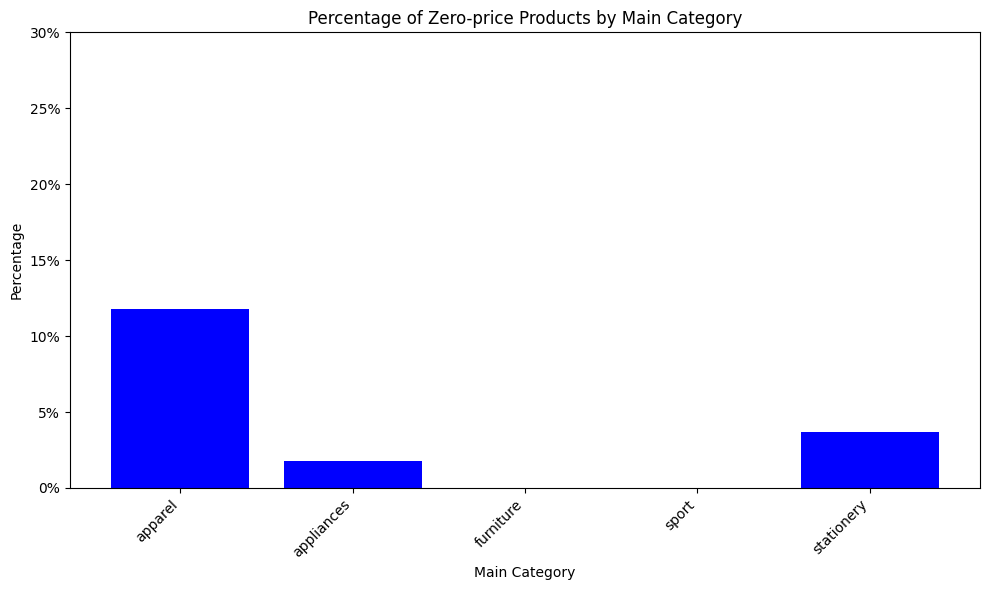

In [ ]:
# Calculate the percentage of zero-price products by main category
percentage_zero_price = zeroprice_mainCat/mainCat_values * 100

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(percentage_zero_price.index, percentage_zero_price, color='blue')
plt.title('Percentage of Zero-price Products by Main Category')
plt.xlabel('Main Category')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 30)  # Set y-axis limit to 0-100 for percentage

# Format y-axis labels as percentages
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Donut chart of event_type
zeroprice_event_names = zero_price['event_type'].unique()
zeroprice_event_values = zero_price['event_type'].value_counts()
fig = px.pie(names=zeroprice_event_names, values=zeroprice_event_values, hole=0.3)
fig.update_layout({"title":{"text":"Distibution of zero-price product events", "x":0.50}})
fig.show()


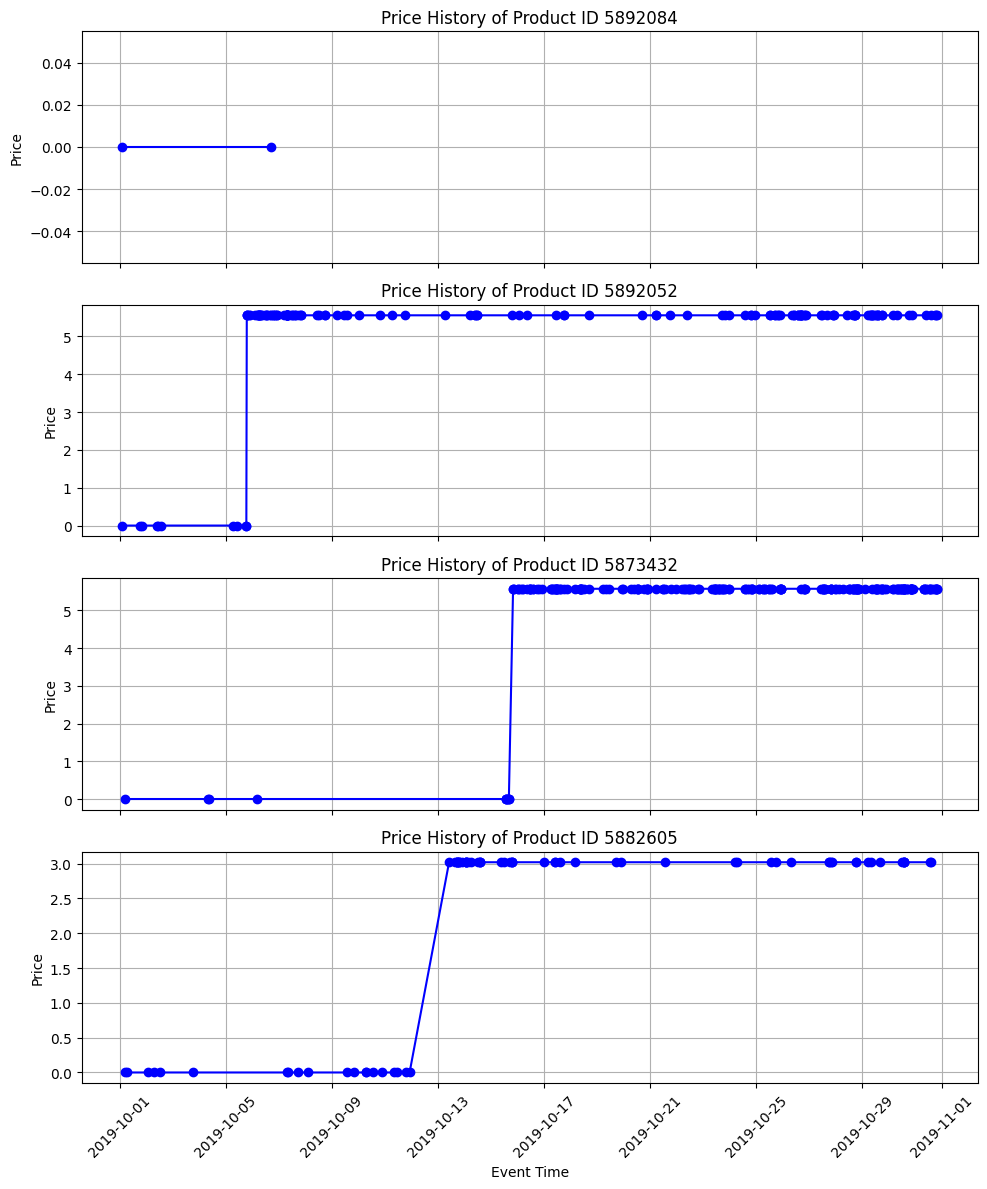

In [ ]:

# Some ids
zeroprice_id = [5892084, 5892052, 5873432, 5882605]

# Convert event_time to datetime format
data['event_time'] = pd.to_datetime(data['event_time'])

# Create subplots
fig, axs = plt.subplots(len(zeroprice_id), 1, figsize=(10, 12), sharex=True)

# Plot price history for each product
for i, product_id in enumerate(zeroprice_id):
    product_data = data[data['product_id'] == product_id]
    axs[i].plot(product_data['event_time'], product_data['price'], marker='o', linestyle='-', color='b')
    axs[i].set_title(f'Price History of Product ID {product_id}')
    axs[i].set_ylabel('Price')
    axs[i].grid(True)

axs[len(zeroprice_id) - 1].set_xlabel('Event Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:


zeroprice_products = data.groupby('product_id')
mean_price = zeroprice_products['price'].mean()
zeromean_price = mean_price[mean_price==0]
print(zeromean_price)
print('Number of products has zero price throughout the whole month: ', len(zeromean_price))


product_id
5837453    0.0
5837553    0.0
5837554    0.0
5864610    0.0
5870110    0.0
          ... 
5900459    0.0
5900460    0.0
5900461    0.0
5900462    0.0
5900464    0.0
Name: price, Length: 280, dtype: float64
Number of products has zero price throughout the whole month:  280


In [ ]:
def cleanBrand_test():
    df = {
        'product_id': [5773203, 5773353, 5881589, 5773353, 5723490, 5881449, 5857269, 5773203],
        'brand': ['a', 'nan', 'c', 'b', 'd', 'd', 'nan', 'g']
    }
    df = pd.DataFrame(df)
    print(df)

    # Group by product_id and count distinct brands
    product_brands_df = df.groupby('product_id')['brand'].unique().reset_index()
    print(product_brands_df)

    print(f'Found {len(product_brands_df[product_brands_df.brand.apply(lambda x: len(x) > 1)])} brand with multiple brands')

    def clean_brand(brand_list):
            for brand in brand_list:
                if brand and brand!='nan':
                    return brand
            return None

    product_brands_df['brand'] = product_brands_df['brand'].apply(clean_brand)
    print(product_brands_df)

    df = df.merge(product_brands_df[['product_id', 'brand']], on='product_id', how='left', suffixes=('', '_new'))
    print(df)
    df['brand'] = df['brand_new'].fillna(df['brand'])
    df.drop(columns=['brand_new'], inplace=True)
    print(df)

cleanBrand_test()


   product_id brand
0     5773203     a
1     5773353   nan
2     5881589     c
3     5773353     b
4     5723490     d
5     5881449     d
6     5857269   nan
7     5773203     g
   product_id     brand
0     5723490       [d]
1     5773203    [a, g]
2     5773353  [nan, b]
3     5857269     [nan]
4     5881449       [d]
5     5881589       [c]
Found 2 brand with multiple brands
   product_id brand
0     5723490     d
1     5773203     a
2     5773353     b
3     5857269  None
4     5881449     d
5     5881589     c
   product_id brand brand_new
0     5773203     a         a
1     5773353   nan         b
2     5881589     c         c
3     5773353     b         b
4     5723490     d         d
5     5881449     d         d
6     5857269   nan      None
7     5773203     g         a
   product_id brand
0     5773203     a
1     5773353     b
2     5881589     c
3     5773353     b
4     5723490     d
5     5881449     d
6     5857269   nan
7     5773203     a


In [ ]:
# Group by product_id and count distinct brands
num_brands = data.groupby('product_id')['brand'].nunique().sort_values(ascending=False).reset_index().iloc[0]['brand']
print(num_brands)

# In case the product has various brands throughout the period: fill the NaN with brand from this table
if int(num_brands)>1:

    product_brands = data.groupby('product_id')['brand'].unique().reset_index()

    print('------------------------------------------')
    print(f'Found {len(product_brands[product_brands.brand.apply(lambda x: len(x) > 1)])} brand with multiple brands...')
    print('------------------------------------------')

    # if brand has 2 brands, choose the one that is not null
    def clean_brand(brand_list):
        for brand in brand_list:
            if brand and brand!='nan':
                return brand
        return None

    product_brands['brand'] = product_brands['brand'].apply(clean_brand)

    def fill_brand(df, product_brands_df):
        df = df.merge(product_brands_df[['product_id', 'brand']], on='product_id', how='left', suffixes=('', '_new'))
        df['brand'] = df['brand_new'].fillna(df['brand'])
        df.drop(columns=['brand_new'], inplace=True)
        print('Filled successfully')

    fill_brand(data, product_brands)

1


In [ ]:
num_brands = data['brand'].nunique()
print('Total number of brands: ', num_brands)


Total number of brands:  240


In [ ]:
def drop_cart_duplicates(data):
    # Drop cart duplicates
    before_data = len(data)
    cart_data = data[data.event_type=='cart']
    # show duplicates
    #print(cart_data[cart_data.duplicated(subset=['product_id', 'user_id', 'user_session'], keep=False)].sort_values('user_id').head(10))
    cart_duplicates = len(cart_data[cart_data.duplicated(subset=['product_id', 'user_id', 'user_session'], keep=False)])
    print('Found {} duplicates'.format(cart_duplicates))

    data = data[data.event_type!='cart']
    cart_data.drop_duplicates(subset=['product_id', 'user_id', 'user_session'], keep='first', inplace=True)
    # check if exist duplicates
    #print(cart_data[cart_data.duplicated(subset=['product_id', 'user_id', 'user_session'], keep=False)].sort_values('user_id').head(10))

    # union
    data = pd.concat([cart_data, data])
    print('Data from {} rows reduced to {} rows'.format(before_data, len(data)))
    data.sort_values(by=['event_time'])

    return data

data = drop_cart_duplicates(data)
data.head(10)


Found 348863 duplicates


<ipython-input-33-a6c5051ed9c8>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Data from 3889128 rows reduced to 3667559 rows


,event_time,event_type,product_id,category_id,main_category,sub_category,brand,price,user_id,user_session
0,2019-10-01 00:00:00+00:00,cart,5773203,1487580005134238553,NaN,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03+00:00,cart,5773353,1487580005134238553,NaN,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07+00:00,cart,5881589,2151191071051219817,NaN,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01 00:00:07+00:00,cart,5723490,1487580005134238553,NaN,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01 00:00:15+00:00,cart,5881449,1487580013522845895,NaN,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
5,2019-10-01 00:00:16+00:00,cart,5857269,1487580005134238553,NaN,NaN,runail,2.62,430174032,73dea1e7-664e-43f4-8b30-d32b9d5af04f
6,2019-10-01 00:00:19+00:00,cart,5739055,1487580008246412266,NaN,NaN,kapous,4.75,377667011,81326ac6-daa4-4f0a-b488-fd0956a78733
7,2019-10-01 00:00:24+00:00,cart,5825598,1487580009445982239,NaN,NaN,NaN,0.56,467916806,2f5b5546-b8cb-9ee7-7ecd-84276f8ef486
8,2019-10-01 00:00:25+00:00,cart,5698989,1487580006317032337,NaN,NaN,NaN,1.27,385985999,d30965e8-1101-44ab-b45d-cc1bb9fae694
16,2019-10-01 00:00:34+00:00,cart,5670337,1752742615205281895,NaN,NaN,NaN,2.38,546705258,3b5c65c0-bb1c-453b-b340-4ebf973a3136


In [ ]:
def drop_removecart_duplicates(data):
    # Drop cart duplicates
    before_data = len(data)
    removecart_data = data[data.event_type=='remove_from_cart']
    # show duplicates
    #print(removecart_data[removecart_data.duplicated(subset=['product_id', 'user_id', 'user_session'], keep=False)].sort_values('user_id').head(10))
    removecart_duplicates = len(removecart_data[removecart_data.duplicated(subset=['product_id', 'user_id', 'user_session'], keep=False)])
    print('Found {} duplicates'.format(removecart_duplicates))

    data = data[data.event_type!='remove_from_cart']
    removecart_data.drop_duplicates(subset=['product_id', 'user_id', 'user_session'], keep='last', inplace=True)
    # check if exist duplicates
    #print(removecart_data[removecart_data.duplicated(subset=['product_id', 'user_id', 'user_session'], keep=False)].sort_values('user_id').head(10))

    # union
    data = pd.concat([data, removecart_data])
    print('Data from {} rows reduced to {} rows'.format(before_data, len(data)))

    data.sort_values(by=['event_time'])

    return data

data = drop_removecart_duplicates(data)
data.head(10)


Found 128702 duplicates


<ipython-input-34-1aebce65f078>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Data from 3667559 rows reduced to 3597348 rows


,event_time,event_type,product_id,category_id,main_category,sub_category,brand,price,user_id,user_session
0,2019-10-01 00:00:00+00:00,cart,5773203,1487580005134238553,NaN,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03+00:00,cart,5773353,1487580005134238553,NaN,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07+00:00,cart,5881589,2151191071051219817,NaN,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01 00:00:07+00:00,cart,5723490,1487580005134238553,NaN,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01 00:00:15+00:00,cart,5881449,1487580013522845895,NaN,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
5,2019-10-01 00:00:16+00:00,cart,5857269,1487580005134238553,NaN,NaN,runail,2.62,430174032,73dea1e7-664e-43f4-8b30-d32b9d5af04f
6,2019-10-01 00:00:19+00:00,cart,5739055,1487580008246412266,NaN,NaN,kapous,4.75,377667011,81326ac6-daa4-4f0a-b488-fd0956a78733
7,2019-10-01 00:00:24+00:00,cart,5825598,1487580009445982239,NaN,NaN,NaN,0.56,467916806,2f5b5546-b8cb-9ee7-7ecd-84276f8ef486
8,2019-10-01 00:00:25+00:00,cart,5698989,1487580006317032337,NaN,NaN,NaN,1.27,385985999,d30965e8-1101-44ab-b45d-cc1bb9fae694
16,2019-10-01 00:00:34+00:00,cart,5670337,1752742615205281895,NaN,NaN,NaN,2.38,546705258,3b5c65c0-bb1c-453b-b340-4ebf973a3136


In [ ]:
# Derive dataset for distinct products
data_product = data.drop_duplicates(subset='product_id')
data_product


,event_time,event_type,product_id,category_id,main_category,sub_category,brand,price,user_id,user_session
0,2019-10-01 00:00:00+00:00,cart,5773203,1487580005134238553,NaN,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03+00:00,cart,5773353,1487580005134238553,NaN,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07+00:00,cart,5881589,2151191071051219817,NaN,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01 00:00:07+00:00,cart,5723490,1487580005134238553,NaN,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01 00:00:15+00:00,cart,5881449,1487580013522845895,NaN,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
...,...,...,...,...,...,...,...,...,...,...
4069171,2019-10-31 17:40:55+00:00,remove_from_cart,5556098,1487580007659209676,NaN,NaN,cnd,11.11,488043875,1fc42dca-e3bd-425b-9db0-5683c0ad7a41
4069202,2019-10-31 17:41:10+00:00,remove_from_cart,5867468,1487580004882580302,NaN,NaN,NaN,1.35,488043875,1fc42dca-e3bd-425b-9db0-5683c0ad7a41
4069208,2019-10-31 17:41:12+00:00,remove_from_cart,5867532,1487580005595612013,NaN,NaN,NaN,2.10,488043875,1fc42dca-e3bd-425b-9db0-5683c0ad7a41
4084745,2019-10-31 19:43:15+00:00,remove_from_cart,5848306,1487580005595612013,NaN,NaN,NaN,3.00,515625962,cecb8d26-0f85-4432-b3b6-2f5f576864f7


In [ ]:
# Categorize products based on price ranges
bins = [0, 10, 100, 500, float('inf')]
labels = ['0-10 USD', '10-100 USD', '100-500 USD', 'Above 500 USD']
price_range_data = pd.cut(data_product['price'], bins=bins, labels=labels).reset_index()

# Count the number of products in each price range
price_range_counts = price_range_data['price'].value_counts().reset_index()
price_range_counts.columns = ['price', 'count']

# Create a donut chart using Plotly Express
fig = px.pie(price_range_counts, values='count', names='price', hole=0.3,
             labels={'price': 'Price Range'},
             title='Distribution of Products by Price Range')

# Show the donut chart
fig.show()

# Median price of each brand
median_price = data.groupby('brand')['price'].median().reset_index()
print(median_price)


          brand  price
0      airnails   1.43
1         almea  31.43
2        andrea   5.54
3        ardell   6.37
4    art-visage   2.94
..          ...    ...
235       ypsed  19.16
236        yu-r  39.68
237         zab  16.03
238      zeitun  10.87
239      zinger   4.60

[240 rows x 2 columns]


In [ ]:
median_range_data = pd.cut(median_price['price'], bins=bins, labels=labels)

# Count the number of products in each price range
median_range_counts = median_range_data.value_counts()

# Create a donut chart using Plotly Express
fig = px.bar(data_frame=median_range_counts, x=median_range_counts,y=median_range_counts.index,
            orientation='h', labels={'x': 'Number of brands', 'y': 'Median Price Range'},
             title='Number of Brands by Median Price Range')

# Show the donut chart
fig.show()


In [ ]:
def split_datetime(data):
    # Split into date and time
    data['event_time'] = pd.to_datetime(data['event_time'])
    data['date'] = pd.to_datetime(data['event_time'].dt.date)
    data['time'] = data['event_time'].dt.time
    data['weekday'] = data['date'].dt.weekday
    print('Splitted sucessfully')

    data.drop('event_time', axis='columns')
    data = data[['date', 'weekday', 'time', 'event_type', 'product_id', 'category_id', 'main_category', 'sub_category', 'brand', 'price', 'user_id', 'user_session']]
    print('Rearanged sucessfully')

    data.sort_values(by=['date', 'time'])
    data['date'] = pd.to_datetime(data['date'])

    return data

data = split_datetime(data)
data.head(10)


Splitted sucessfully
Rearanged sucessfully


<ipython-input-38-7972adc738cd>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,weekday,time,event_type,product_id,category_id,main_category,sub_category,brand,price,user_id,user_session
0,2019-10-01,1,00:00:00,cart,5773203,1487580005134238553,NaN,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01,1,00:00:03,cart,5773353,1487580005134238553,NaN,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01,1,00:00:07,cart,5881589,2151191071051219817,NaN,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01,1,00:00:07,cart,5723490,1487580005134238553,NaN,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01,1,00:00:15,cart,5881449,1487580013522845895,NaN,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
5,2019-10-01,1,00:00:16,cart,5857269,1487580005134238553,NaN,NaN,runail,2.62,430174032,73dea1e7-664e-43f4-8b30-d32b9d5af04f
6,2019-10-01,1,00:00:19,cart,5739055,1487580008246412266,NaN,NaN,kapous,4.75,377667011,81326ac6-daa4-4f0a-b488-fd0956a78733
7,2019-10-01,1,00:00:24,cart,5825598,1487580009445982239,NaN,NaN,NaN,0.56,467916806,2f5b5546-b8cb-9ee7-7ecd-84276f8ef486
8,2019-10-01,1,00:00:25,cart,5698989,1487580006317032337,NaN,NaN,NaN,1.27,385985999,d30965e8-1101-44ab-b45d-cc1bb9fae694
16,2019-10-01,1,00:00:34,cart,5670337,1752742615205281895,NaN,NaN,NaN,2.38,546705258,3b5c65c0-bb1c-453b-b340-4ebf973a3136


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3597348 entries, 0 to 4102278
Data columns (total 12 columns):
 #   Column         Dtype         
---  ------         -----         
 0   date           datetime64[ns]
 1   weekday        int32         
 2   time           object        
 3   event_type     object        
 4   product_id     int64         
 5   category_id    int64         
 6   main_category  object        
 7   sub_category   object        
 8   brand          object        
 9   price          float64       
 10  user_id        int64         
 11  user_session   object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(3), object(6)
memory usage: 343.1+ MB


In [ ]:

# drop negative prices
def drop_neg_price(data):
    data = data.loc[data.price>=0]
    return data

data = drop_neg_price(data)

In [ ]:
# check neg prices
data.loc[data.price<0]

,date,weekday,time,event_type,product_id,category_id,main_category,sub_category,brand,price,user_id,user_session


In [ ]:
def relative_price(data):
    print('Calculating relative price...')

    start = time.time()
    # calculate percentiles_IQR
    percentiles_IQR = data.groupby('category_id')['price'].quantile([0.25, 0.5, 0.75]).unstack().reset_index()
    percentiles_IQR.rename(columns={0.25: 'Q1', 0.5: 'median', 0.75: 'Q3'}, inplace=True)
    percentiles_IQR['IQR'] = percentiles_IQR['Q3'] - percentiles_IQR['Q1']


    # calculate relative price by price-median/IQR
    data = data.merge(percentiles_IQR, on='category_id', how='left')
    data['relative_price'] = np.where(data['IQR']==0, 0, (data['price']-data['median'])/data['IQR'])
    data['relative_price'] = data['relative_price'].apply(lambda x: max(min(x, 10), -10))  # avoid exceeding
    data.drop(columns=['Q1', 'Q3', 'median', 'IQR'], axis='columns',inplace=True)
    end = time.time()
    # rearrange
    data = data[['date', 'weekday', 'time', 'event_type', 'product_id', 'category_id', 'main_category', 'sub_category',
                'brand', 'price', 'relative_price', 'user_id', 'user_session']]
    print('Finished in {0:.3f}s'.format(end-start))
    return data

data = relative_price(data)
data.describe()

Calculating relative price...
Finished in 6.161s


,date,weekday,product_id,category_id,price,relative_price,user_id
count,3597328,3.597328e+06,3.597328e+06,3.597328e+06,3.597328e+06,3.597328e+06,3.597328e+06
mean,2019-10-15 16:25:49.686212096,2.772886e+00,5.465313e+06,1.545429e+18,8.990314e+00,2.618337e-01,5.008533e+08
min,2019-10-01 00:00:00,0.000000e+00,3.752000e+03,1.487580e+18,0.000000e+00,-1.000000e+01,4.103071e+06
25%,2019-10-08 00:00:00,1.000000e+00,5.723503e+06,1.487580e+18,2.370000e+00,-2.059369e-01,4.687971e+08
50%,2019-10-16 00:00:00,3.000000e+00,5.809218e+06,1.487580e+18,4.220000e+00,0.000000e+00,5.385138e+08
75%,2019-10-23 00:00:00,4.000000e+00,5.850626e+06,1.487580e+18,7.220000e+00,3.950617e-01,5.576057e+08
max,2019-10-31 00:00:00,6.000000e+00,5.900470e+06,2.195085e+18,3.076000e+02,1.000000e+01,5.662808e+08
std,NaN,1.946518e+00,1.328695e+06,1.560948e+17,2.000007e+01,1.292298e+00,8.228283e+07


In [ ]:
data.isna().sum()

date                    0
weekday                 0
time                    0
event_type              0
product_id              0
category_id             0
main_category     3536227
sub_category      3536227
brand             1451963
price                   0
relative_price          0
user_id                 0
user_session          446
dtype: int64

In [ ]:
clean_name = f'{name}-clean'

**Feature Engineering**

In [ ]:
def merge_dataframe(list_data, on=None, suffixes=('_x', '_y')):

	df_merge = list_data[0]
	for df in list_data[1:]:
		df_merge = df_merge.merge(df, on=on, how='left', suffixes=suffixes)

	return df_merge

Product table

In [ ]:
def create_productTable(data):

	start = time.time()
	# feature engineering
	print('Basic features processing...')
	productTable = data.groupby('product_id').agg(
		first_date=('date', 'min'),
		last_date=('date', 'max'),
		category_id=('category_id', 'first'),
		avg_price=('price', 'mean'),
		relative_price=('relative_price', 'mean'),
		views=('event_type', lambda x: (x == 'view').sum()),
		carts=('event_type', lambda x: (x == 'cart').sum()),
		remove_from_carts=('event_type', lambda x: (x == 'remove_from_cart').sum()),
		purchases=('event_type', lambda x: (x == 'purchase').sum()),
	).reset_index()

	print('Interaction rates processing...')
	# calculate rate
	productTable['cart_per_view'] = 100*np.where(productTable['views'] == 0, productTable['carts'], productTable['carts']/productTable['views'])
	productTable['purchase_per_view'] = 100*np.where(productTable['views'] == 0, productTable['purchases'], productTable['purchases']/productTable['views'])
	productTable['remove_per_cart'] = 100*np.where(productTable['carts'] == 0, productTable['remove_from_carts'], productTable['remove_from_carts']/productTable['carts'])
	productTable['purchase_per_cart'] = 100*np.where(productTable['carts'] == 0, productTable['purchases'], productTable['purchases']/productTable['carts'])

	# by weighted mean
	total_views = productTable[['views']].sum().sum()
	total_carts = productTable[['carts']].sum().sum()
	total_removes = productTable[['remove_from_carts']].sum().sum()
	total_purchases = productTable[['purchases']].sum().sum()

	# rate by weights
	productTable['cart_per_view'] = productTable['cart_per_view']\
			*(productTable['views']/total_views)
	productTable['purchase_per_view'] = productTable['purchase_per_view']\
			*(productTable['views']/total_views)
	productTable['remove_per_cart'] = productTable['remove_per_cart']\
			*((productTable['carts'])/total_carts)
	productTable['purchase_per_cart'] = productTable['purchase_per_cart']\
			*((productTable['carts'])/total_carts)

	# normalize rates by min-max
	rate_columns = ['cart_per_view', 'purchase_per_view', 'remove_per_cart', 'purchase_per_cart']
	for col in rate_columns:
		min_value = productTable[col].min()
		max_value = productTable[col].max()
		productTable[col] = (productTable[col] - min_value) / (max_value - min_value)
	end = time.time()

	print('Create product table success. Finish in {0:.3f}s'.format(end-start))
	return productTable

productTable = create_productTable(data)
print(productTable.head(20));

Basic features processing...
Interaction rates processing...
Create product table success. Finish in 38.732s
    product_id first_date  last_date          category_id  avg_price  \
0         3752 2019-10-01 2019-10-31  1487580005411062629      15.71   
1         3762 2019-10-01 2019-10-31  1487580005411062629      19.37   
2         3763 2019-10-01 2019-10-31  1487580005411062629      16.03   
3         3771 2019-10-08 2019-10-29  1487580005411062629      15.08   
4         3774 2019-10-01 2019-10-31  1487580005411062629      16.03   
5         3776 2019-10-01 2019-10-31  1487580005411062629      16.03   
6         3783 2019-10-03 2019-10-14  1487580005343953762       7.92   
7         3788 2019-10-08 2019-10-08  1487580005343953762      12.54   
8         3790 2019-10-01 2019-10-29  1487580005343953762       7.92   
9         3806 2019-10-01 2019-10-31  1487580005411062629      16.03   
10        3809 2019-10-08 2019-10-19  1487580005343953762      12.54   
11        3812 2019-10-13 2

In [ ]:
productTable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41894 entries, 0 to 41893
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   product_id         41894 non-null  int64         
 1   first_date         41894 non-null  datetime64[ns]
 2   last_date          41894 non-null  datetime64[ns]
 3   category_id        41894 non-null  int64         
 4   avg_price          41894 non-null  float64       
 5   relative_price     41894 non-null  float64       
 6   views              41894 non-null  int64         
 7   carts              41894 non-null  int64         
 8   remove_from_carts  41894 non-null  int64         
 9   purchases          41894 non-null  int64         
 10  cart_per_view      41894 non-null  float64       
 11  purchase_per_view  41894 non-null  float64       
 12  remove_per_cart    41894 non-null  float64       
 13  purchase_per_cart  41894 non-null  float64       
dtypes: dat

In [ ]:
productTable.describe()

,product_id,first_date,last_date,category_id,avg_price,relative_price,views,carts,remove_from_carts,purchases,cart_per_view,purchase_per_view,remove_per_cart,purchase_per_cart
count,4.189400e+04,41894,41894,4.189400e+04,41894.000000,41894.000000,41894.000000,41894.000000,41894.000000,41894.000000,41894.000000,41894.000000,41894.000000,41894.000000
mean,5.533471e+06,2019-10-03 18:18:30.574306560,2019-10-27 15:31:35.813243136,1.569743e+18,7.574609,0.452792,44.446699,23.455602,12.110756,5.854323,0.012308,0.008360,0.014458,0.008363
min,3.752000e+03,2019-10-01 00:00:00,2019-10-01 00:00:00,1.487580e+18,0.000000,-10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.742414e+06,2019-10-01 00:00:00,2019-10-28 00:00:00,1.487580e+18,2.780000,-0.128521,5.000000,3.000000,1.000000,0.000000,0.001575,0.000000,0.001199,0.000000
50%,5.819258e+06,2019-10-01 00:00:00,2019-10-30 00:00:00,1.487580e+18,4.700000,0.000000,14.000000,8.000000,4.000000,1.000000,0.004199,0.001429,0.004796,0.001429
75%,5.858024e+06,2019-10-02 00:00:00,2019-10-31 00:00:00,1.487580e+18,7.780000,0.663866,37.000000,21.000000,12.000000,5.000000,0.011024,0.007143,0.014388,0.007143
max,5.900470e+06,2019-10-31 00:00:00,2019-10-31 00:00:00,2.195085e+18,307.600000,10.000000,9013.000000,1905.000000,834.000000,700.000000,1.000000,1.000000,1.000000,1.000000
std,1.215291e+06,NaN,NaN,1.756316e+17,11.711710,1.667722,149.575513,60.259567,28.561078,18.780928,0.031634,0.026831,0.034268,0.026830


In [ ]:
product_name = f'{name}-product'

 User table

In [ ]:
def create_userInteraction(data):
    # count events
    views = data.loc[data.event_type=='view'].groupby('user_id').event_type.count().reset_index()
    views.rename(columns={'event_type': 'views'}, inplace=True)
    carts = data.loc[data.event_type=='cart'].groupby('user_id').event_type.count().reset_index()
    carts.rename(columns={'event_type': 'carts'}, inplace=True)
    removes = data.loc[data.event_type=='remove_from_cart'].groupby('user_id').event_type.count().reset_index()
    removes.rename(columns={'event_type': 'remove_from_carts'}, inplace=True)
    purchases = data.loc[data.event_type=='purchase'].groupby('user_id').event_type.count().reset_index()
    purchases.rename(columns={'event_type': 'purchases'}, inplace=True)
    sumEvent_mask = merge_dataframe([views, carts, removes, purchases], on='user_id')
    sumEvent_mask.fillna(0, inplace=True)

    # average price
    viewPrice_mask = data.loc[data.event_type=='view'].groupby(['user_id']).price.mean().reset_index()
    viewPrice_mask.rename(columns={'price': 'avg_view_price'}, inplace=True)
    purchasePrice_mask = data.loc[data.event_type=='cart'].groupby(['user_id']).price.mean().reset_index()
    purchasePrice_mask.rename(columns={'price': 'avg_purchase_price'}, inplace=True)
    avgPrice_mask = merge_dataframe([viewPrice_mask, purchasePrice_mask], on='user_id')
    avgPrice_mask.fillna(0, inplace=True)

    # average price
    viewRelative_mask = data.loc[data.event_type=='view'].groupby(['user_id']).relative_price.mean().reset_index()
    viewRelative_mask.rename(columns={'relative_price': 'avg_view_relative_price'}, inplace=True)
    purchaseRelative_mask = data.loc[data.event_type=='cart'].groupby(['user_id']).relative_price.mean().reset_index()
    purchaseRelative_mask.rename(columns={'relative_price': 'avg_purchase_relative_price'}, inplace=True)
    avgRelative_mask = merge_dataframe([viewRelative_mask, purchaseRelative_mask], on='user_id')
    avgRelative_mask.fillna(0, inplace=True)
    # distinct product counts by event
    viewCount_mask = data.loc[data.event_type=='view'].groupby(['user_id']).product_id.nunique().reset_index()
    viewCount_mask.rename(columns={'product_id': 'distinct_view_product'}, inplace=True)
    cartCount_mask = data.loc[data.event_type=='cart'].groupby(['user_id']).product_id.nunique().reset_index()
    cartCount_mask.rename(columns={'product_id': 'distinct_cart_product'}, inplace=True)
    removeCount_mask = data.loc[data.event_type=='remove_from_cart'].groupby(['user_id']).product_id.nunique().reset_index()
    removeCount_mask.rename(columns={'product_id': 'distinct_remove_product'}, inplace=True)
    purchaseCount_mask = data.loc[data.event_type=='purchase'].groupby(['user_id']).product_id.nunique().reset_index()
    purchaseCount_mask.rename(columns={'product_id': 'distinct_purchase_product'}, inplace=True)
    eventCount_mask = merge_dataframe([viewCount_mask, cartCount_mask, removeCount_mask, purchaseCount_mask], on='user_id')
    eventCount_mask.fillna(0, inplace=True)

    return merge_dataframe([sumEvent_mask, avgPrice_mask, avgRelative_mask, eventCount_mask,], on='user_id')




In [ ]:
# create user table
def create_userTable(data):
	start = time.time()
	# feature engineering
	print('Basic features processing...')
	userTable = data.groupby('user_id').agg(
		first_date=('date', 'min'),
		last_date=('date', 'max'),
	).reset_index()

	userTable['first_date'] = pd.to_datetime(userTable['first_date'])
	userTable['last_date'] = pd.to_datetime(userTable['last_date'])

	print('Interaction features processing...')
	# create event features
	userTable = merge_dataframe([userTable, create_userInteraction(data)], on='user_id')

	print('Interaction rates processing...')
	# calculate rate
	userTable['cart_per_view'] = 100*np.where(userTable['views'] == 0, userTable['carts'], userTable['carts']/userTable['views'])
	userTable['purchase_per_view'] = 100*np.where(userTable['views'] == 0, userTable['purchases'], userTable['purchases']/userTable['views'])
	userTable['remove_per_cart'] = 100*np.where(userTable['carts'] == 0, userTable['remove_from_carts'], userTable['remove_from_carts']/userTable['carts'])
	userTable['purchase_per_cart'] = 100*np.where(userTable['carts'] == 0, userTable['purchases'], userTable['purchases']/userTable['carts'])
	userTable.fillna(0, inplace=True)

	# by weighted mean
	total_views = userTable[['views']].sum().sum()
	total_carts = userTable[['carts']].sum().sum()
	total_removes = userTable[['remove_from_carts']].sum().sum()
	total_purchases = userTable[['purchases']].sum().sum()

	# rate by weights
	userTable['cart_per_view'] = userTable['cart_per_view']\
			*(userTable['views']/total_views)
	userTable['purchase_per_view'] = userTable['purchase_per_view']\
			*(userTable['views']/total_views)
	userTable['remove_per_cart'] = userTable['remove_per_cart']\
			*((userTable['carts'])/total_carts)
	userTable['purchase_per_cart'] = userTable['purchase_per_cart']\
			*((userTable['carts'])/total_carts)

	# normalize rates by min-max
	rate_columns = ['cart_per_view', 'purchase_per_view', 'remove_per_cart', 'purchase_per_cart']
	for col in rate_columns:
		min_value = userTable[col].min()
		max_value = userTable[col].max()
		userTable[col] = (userTable[col] - min_value) / (max_value - min_value)

	# change type
	print('Check datatypes processing...')
	columns = userTable.columns
	userTable_type = ['int64', 'date', 'date',
		   			'int64', 'int64', 'int64', 'int64',
		   			'float', 'float', 'float', 'float',
					'int64', 'int64', 'int64', 'int64',
					'float', 'float', 'float', 'float']
	for i, col in enumerate(columns):
		if i in [1,2]: pass # i change date already
		else: userTable[col] = userTable[col].astype(userTable_type[i])

	end = time.time()
	print('Create user table success. Finish in {0:.3f}s'.format(end-start))
	return userTable

userTable = create_userTable(data)
print(userTable.head(20))

Basic features processing...
Interaction features processing...
Interaction rates processing...
Check datatypes processing...
Create user table success. Finish in 9.979s
     user_id first_date  last_date  views  carts  remove_from_carts  \
0    4103071 2019-10-21 2019-10-21      7      1                  0   
1    8846226 2019-10-01 2019-10-02      7     24                 12   
2    9794320 2019-10-01 2019-10-23      3      2                  3   
3   10280338 2019-10-21 2019-10-27     26     24                 24   
4   10702733 2019-10-15 2019-10-15      2      0                  0   
5   10968431 2019-10-29 2019-10-29      1      1                  0   
6   12055855 2019-10-16 2019-10-16      2      0                  0   
7   13383118 2019-10-12 2019-10-12      1      0                  0   
8   13392135 2019-10-02 2019-10-27      6      3                  0   
9   14081087 2019-10-14 2019-10-14      1      0                  0   
10  14297993 2019-10-08 2019-10-31     20      3 

In [ ]:
userTable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399664 entries, 0 to 399663
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   user_id                      399664 non-null  int64         
 1   first_date                   399664 non-null  datetime64[ns]
 2   last_date                    399664 non-null  datetime64[ns]
 3   views                        399664 non-null  int64         
 4   carts                        399664 non-null  int64         
 5   remove_from_carts            399664 non-null  int64         
 6   purchases                    399664 non-null  int64         
 7   avg_view_price               399664 non-null  float64       
 8   avg_purchase_price           399664 non-null  float64       
 9   avg_view_relative_price      399664 non-null  float64       
 10  avg_purchase_relative_price  399664 non-null  float64       
 11  distinct_view_product     

In [ ]:
userTable.describe()

,user_id,first_date,last_date,views,carts,remove_from_carts,purchases,avg_view_price,avg_purchase_price,avg_view_relative_price,avg_purchase_relative_price,distinct_view_product,distinct_cart_product,distinct_remove_product,distinct_purchase_product,cart_per_view,purchase_per_view,remove_per_cart,purchase_per_cart
count,3.996640e+05,399664,399664,399664.000000,399664.000000,399664.000000,399664.000000,399664.000000,399664.000000,399664.000000,399664.000000,399664.000000,399664.000000,399664.000000,399664.000000,399664.000000,399664.000000,399664.000000,399664.000000
mean,5.288604e+08,2019-10-13 19:56:21.584531456,2019-10-15 11:40:28.295768832,4.659039,2.328348,1.228752,0.585559,15.593047,2.464313,0.487741,0.105710,3.510254,2.218351,1.173861,0.571135,0.002222,0.001780,0.000936,0.001772
min,4.103071e+06,2019-10-01 00:00:00,2019-10-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.000000,-8.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.295908e+08,2019-10-06 00:00:00,2019-10-07 00:00:00,1.000000,0.000000,0.000000,0.000000,3.546198,0.000000,-0.106413,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.571228e+08,2019-10-13 00:00:00,2019-10-15 00:00:00,1.000000,0.000000,0.000000,0.000000,6.300000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.607882e+08,2019-10-22 00:00:00,2019-10-24 00:00:00,3.000000,1.000000,0.000000,0.000000,13.970000,2.620000,0.663866,0.000000,2.000000,1.000000,0.000000,0.000000,0.000954,0.000000,0.000000,0.000000
max,5.662808e+08,2019-10-31 00:00:00,2019-10-31 00:00:00,3086.000000,1048.000000,1297.000000,329.000000,307.600000,299.810000,10.000000,10.000000,1102.000000,1047.000000,1128.000000,327.000000,1.000000,1.000000,1.000000,1.000000
std,6.374482e+07,NaN,NaN,17.694462,11.030700,8.415544,3.647920,28.567443,8.567858,1.460932,0.701179,11.317503,10.146840,7.678078,3.512664,0.010525,0.011088,0.006480,0.011075


In [ ]:
user_name = f'{name}-user'

Recommendation System


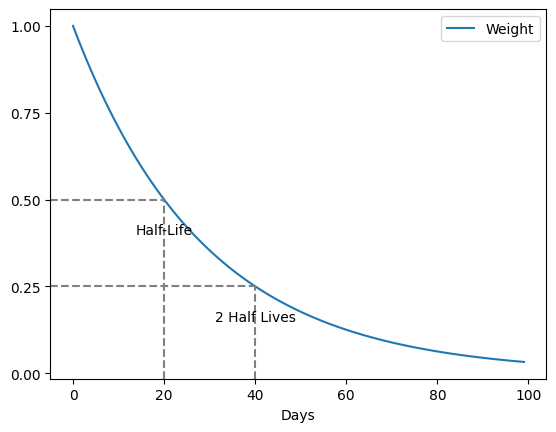

In [ ]:
# Plot the half-life decay function

half_life = 20
x = np.arange(0, 100)
y = np.power(0.5, x / half_life)
df = pd.DataFrame({'Days': x, 'Weight': y})

# Plot the function
ax = df.plot(x='Days', y='Weight')

# Add vertical lines at 20 and 40 days with explanatory text
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.axvline(x=20, linestyle='--', color='gray', ymax=0.49)
ax.axvline(x=40, linestyle='--', color='gray', ymax=0.25)
ax.axhline(y=0.5, linestyle='--', color='gray', xmax=0.23)
ax.axhline(y=0.25, linestyle='--', color='gray', xmax=0.41)
ax.text(20, 0.4, 'Half-Life', ha='center')
ax.text(40, 0.15, '2 Half Lives', ha='center')

plt.show()

In [ ]:

def calculate_recency(data):
    # Get the timestamp of the most recent event in the data_rec
    data_rec = data.copy()
    last_date = data_rec['date'].max()
    recency_days = 15
    weight_decay = 0.5

    # Calculate the recency of each event in terms of days
    data_rec['recency'] = (last_date - data_rec['date']).dt.total_seconds() / (24 * 60 * 60)

    # Half-life decay function, the value of an event with weight_decay after recency_days days
    data_rec['recency_coef'] = np.exp(np.log(weight_decay) * data_rec['recency'] / recency_days)

    # Drop the 'date' column if needed for real-time system
    data_rec.drop(columns=['date', 'time'], inplace=True)

    return data_rec

data_rec = calculate_recency(data)

In [ ]:

data_rec

,weekday,event_type,product_id,category_id,main_category,sub_category,brand,price,relative_price,user_id,user_session,recency,recency_coef
0,1,cart,5773203,1487580005134238553,NaN,NaN,runail,2.62,0.000000,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,30.0,0.25
1,1,cart,5773353,1487580005134238553,NaN,NaN,runail,2.62,0.000000,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,30.0,0.25
2,1,cart,5881589,2151191071051219817,NaN,NaN,lovely,13.48,1.917676,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,30.0,0.25
3,1,cart,5723490,1487580005134238553,NaN,NaN,runail,2.62,0.000000,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,30.0,0.25
4,1,cart,5881449,1487580013522845895,NaN,NaN,lovely,0.56,-0.535232,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,30.0,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3597323,3,remove_from_cart,5826183,1487580007483048900,NaN,NaN,NaN,3.33,0.000000,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,0.0,1.00
3597324,3,remove_from_cart,5835924,1487580009471148064,NaN,NaN,irisk,1.51,0.223776,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,0.0,1.00
3597325,3,remove_from_cart,5870822,1487580007675986893,NaN,NaN,milv,0.79,-0.600000,429913900,2f0bff3c-252f-4fe6-afcd-5d8a6a92839a,0.0,1.00
3597326,3,remove_from_cart,5747404,1487580005671109489,NaN,NaN,masura,6.33,3.567568,429913900,2f0bff3c-252f-4fe6-afcd-5d8a6a92839a,0.0,1.00


In [ ]:
def create_interactionTable(data, view_weight=0.1, cart_weight=0.4, remove_from_cart_weight=-0.3, purchase_weight=1.0):

    start = time.time()

    print('Calculating basic interactions...')
    # initial dataframe
    interactionTable = pd.DataFrame(columns=['user_id', 'product_id'])
    interactionTable.user_id = data.user_id
    interactionTable.product_id = data.product_id
    interactionTable.drop_duplicates(inplace=True)

    # for every event, calculate the interaction score for each user-product pair
    event_names = ['view', 'cart', 'remove_from_cart', 'purchase']
    event_weights = [view_weight, cart_weight, remove_from_cart_weight, purchase_weight]
    for name in event_names:
        df = data.loc[data['event_type']==name].groupby(['user_id', 'product_id']).recency_coef.sum().reset_index()
        df.rename(columns={'recency_coef': f'{name}s'}, inplace=True)
        interactionTable = merge_dataframe([interactionTable, df], on=['user_id', 'product_id'])

    # fill NaN with 0 (0 interaction score)
    interactionTable.fillna(value=0, inplace=True)

    print('Calculating interaction scores...')
    # calculate the interaction overall score for user-product pair by weight
    interactionTable['interaction_score'] = 0
    for weight, name in zip(event_weights, event_names):
        interactionTable['interaction_score'] += weight*interactionTable[f'{name}s']

    interactionTable['interaction_score'] = interactionTable['interaction_score'].apply(lambda x: max(0,x))
    interactionTable['interaction_score'] = interactionTable['interaction_score'].apply(lambda x: min(100,x))

    interactionTable.sort_values(by='interaction_score', ascending=False, inplace=True)

    # drop columns
    for name in event_names:
        interactionTable.drop(columns=f'{name}s', inplace=True)
    end = time.time()

    print('Create interaction table success. Finished in {0:.3f}s'.format(end-start))

    return interactionTable

interactionTable = create_interactionTable(data_rec)
interactionTable.describe()

Calculating basic interactions...
Calculating interaction scores...
Create interaction table success. Finished in 11.094s


,user_id,product_id,interaction_score
count,2.134728e+06,2.134728e+06,2.134728e+06
mean,5.028484e+08,5.454088e+06,1.766782e-01
std,8.127790e+07,1.349828e+06,2.640729e-01
min,4.103071e+06,3.752000e+03,0.000000e+00
25%,4.713322e+08,5.716843e+06,3.968503e-02
50%,5.404094e+08,5.809116e+06,7.578583e-02
75%,5.579989e+08,5.851245e+06,1.823445e-01
max,5.662808e+08,5.900470e+06,1.253372e+01


In [ ]:
interactionTable['user_index'] = pd.factorize(interactionTable['user_id'])[0]
interactionTable['product_index'] = pd.factorize(interactionTable['product_id'])[0]

print(interactionTable.head(20));

           user_id  product_id  interaction_score  user_index  product_index
1933503  256480321     5864578          12.533717           0              0
945017   546464358     5872979           8.268916           1              1
772883   564294357     5834157           6.484251           2              2
679038   543878923        5013           5.963198           3              3
966704   550388516     5885321           5.579634           4              4
966640   550388516     5885298           5.513555           4              5
966662   550388516     5885305           5.451353           4              6
921013   550469726     5560754           5.291328           5              7
784885   562390106     5892179           5.264019           6              8
966709   550388516     5885320           5.260957           4              9
966643   550388516     5885299           5.228760           4             10
966721   550388516     5885314           5.094115           4             11

In [ ]:
interactionTable.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2134728 entries, 1933503 to 1580
Data columns (total 5 columns):
 #   Column             Dtype  
---  ------             -----  
 0   user_id            int64  
 1   product_id         int64  
 2   interaction_score  float64
 3   user_index         int64  
 4   product_index      int64  
dtypes: float64(1), int64(4)
memory usage: 97.7 MB


In [ ]:
interactionTable = interactionTable[['user_id', 'user_index', 'product_id', 'product_index', 'interaction_score']]
interactionTable

,user_id,user_index,product_id,product_index,interaction_score
1933503,256480321,0,5864578,0,12.533717
945017,546464358,1,5872979,1,8.268916
772883,564294357,2,5834157,2,6.484251
679038,543878923,3,5013,3,5.963198
966704,550388516,4,5885321,4,5.579634
...,...,...,...,...,...
818052,445287623,35441,5797964,10552,0.000000
818680,525071537,69,5788138,9576,0.000000
818684,406644045,3907,5755451,19948,0.000000
1543356,517169269,38372,5886712,3858,0.000000


In [ ]:
interaction_name = f'{name}-interaction'

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
def checkpoint_call():
    if not os.path.exists('checkpoints'):
        os.makedirs('checkpoints')
    model_ver = max([int(i) for i in os.listdir(f"checkpoints")]+[0]) + 1
    filepath=f"checkpoints/{model_ver}/"+"{epoch}.ckpt"
    return ModelCheckpoint(filepath, monitor='val_loss', verbose=1,
                                           save_weights_only=True, save_best_only=True, mode='min')

Collaborative by Neural Network

In [ ]:
train, test = train_test_split(interactionTable, test_size=0.2, random_state=42)

attributes = ['user_index', 'product_index', 'interaction_score']

train = train[attributes]

test = test[attributes]

train

,user_index,product_index,interaction_score
431891,48620,10773,0.084704
946212,26593,36175,0.025000
156299,32360,4423,0.081491
451662,18505,2338,0.638206
1580130,283136,3,0.054841
...,...,...,...
2069868,83826,9818,0.000000
1375608,325614,751,0.041562
153546,118454,18792,0.120303
503813,16076,20297,0.750000


In [ ]:
num_users = train['user_index'].nunique()
num_products = test['product_index'].nunique()

user_input = tf.keras.layers.Input(shape=(1,))
product_input = tf.keras.layers.Input(shape=(1,))

user_embedding = tf.keras.layers.Embedding(num_users, 64)(user_input)
dense_user_1 = tf.keras.layers.Dense(32, activation='relu')(user_embedding)
dense_user_2 = tf.keras.layers.Dense(16, activation='relu')(dense_user_1)



product_embedding = tf.keras.layers.Embedding(num_products, 64)(product_input)
dense_product_1 = tf.keras.layers.Dense(32, activation='relu')(product_embedding)
dense_product_2 = tf.keras.layers.Dense(16, activation='relu')(dense_product_1)


merged_embeddings = tf.keras.layers.Concatenate()([dense_user_2, dense_product_2])
flatten_embeddings = tf.keras.layers.Flatten()(merged_embeddings)

output = tf.keras.layers.Dense(1, activation='linear')(flatten_embeddings)

model = tf.keras.models.Model(inputs=[user_input, product_input], outputs=output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 embedding (Embedding)       (None, 1, 64)                2225164   ['input_1[0][0]']             
                                                          8                                       
                                                                                                  
 embedding_1 (Embedding)     (None, 1, 64)                2265664   ['input_2[0][0]']         

In [ ]:
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import TensorBoard

initial_learning_rate = 0.001
lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=100,
    decay_rate=0.96,
    staircase=True)

adam = optimizers.Adam(learning_rate=lr_schedule)

rmsprop = tf.keras.optimizers.RMSprop(learning_rate=lr_schedule)

sgd = optimizers.SGD(learning_rate=lr_schedule)

loss = tf.keras.losses.MeanSquaredError()

# Callback
logdir = 'logs'
tensorboard_callback = TensorBoard(log_dir=logdir)
checkpoint_callback = checkpoint_call()

# Rest of your code...


In [ ]:
model.compile(optimizer=rmsprop, loss=loss)

In [ ]:
hist = model.fit([train['user_index'], train['product_index']], train['interaction_score'],
          validation_data = [[test['user_index'], test['product_index']], test['interaction_score']],
          epochs=3, batch_size=512, verbose=1)




Epoch 1/3
3336/3336 [==============================] - 40s 11ms/step - loss: 0.0617 - val_loss: 0.0562
Epoch 2/3
3336/3336 [==============================] - 33s 10ms/step - loss: 0.0533 - val_loss: 0.0548
Epoch 3/3
3336/3336 [==============================] - 32s 10ms/step - loss: 0.0515 - val_loss: 0.0546


In [ ]:
loss = model.evaluate([test['user_index'], test['product_index']], test['interaction_score'])
print(f"Mean Squared Error on test data: {loss}")

13343/13343 [==============================] - 53s 4ms/step - loss: 0.0546
Mean Squared Error on test data: 0.054573312401771545


Content-based by Neural Network

In [ ]:
def create_featureTable(interactionTable):
    featureTable = merge_dataframe([interactionTable, userTable], on='user_id', suffixes=('','_user'))
    featureTable = merge_dataframe([featureTable, productTable], on='product_id', suffixes=('_user','_product'))
    featureTable.drop(columns=['first_date_user', 'last_date_user', 'first_date_product', 'last_date_product'], inplace=True)

    return featureTable

featureTable = create_featureTable(interactionTable)

In [ ]:
train_name = f'{name}_train'

In [ ]:
featureTable

,user_id,user_index,product_id,product_index,interaction_score,views_user,carts_user,remove_from_carts_user,purchases_user,avg_view_price,...,avg_price,relative_price,views_product,carts_product,remove_from_carts_product,purchases_product,cart_per_view_product,purchase_per_view_product,remove_per_cart_product,purchase_per_cart_product
0,256480321,0,5864578,0,12.533717,250,94,83,15,20.702760,...,26.35,1.212876,158,9,6,3,0.004724,0.004286,0.007194,0.004286
1,546464358,1,5872979,1,8.268916,147,0,0,0,8.890000,...,8.89,0.713643,285,53,26,4,0.027822,0.005714,0.031175,0.005714
2,564294357,2,5834157,2,6.484251,40,8,2,6,5.422500,...,5.71,-0.325472,369,76,40,20,0.039895,0.028571,0.047962,0.028571
3,543878923,3,5013,3,5.963198,102,12,8,0,2.303529,...,1.27,-0.177778,1298,1045,465,366,0.548556,0.522857,0.557554,0.522857
4,550388516,4,5885321,4,5.579634,3086,0,1,0,7.905055,...,12.98,0.844758,238,19,11,2,0.009974,0.002857,0.013189,0.002857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134723,445287623,35441,5797964,10552,0.000000,28,101,144,0,4.146071,...,3.95,1.423423,22,14,8,4,0.007349,0.005714,0.009592,0.005714
2134724,525071537,69,5788138,9576,0.000000,279,226,171,73,10.792151,...,6.35,6.161290,30,30,17,3,0.015748,0.004286,0.020384,0.004286
2134725,406644045,3907,5755451,19948,0.000000,19,27,18,11,5.884211,...,3.97,0.000000,44,22,9,5,0.011549,0.007143,0.010791,0.007143
2134726,517169269,38372,5886712,3858,0.000000,2,1,1,0,1.585000,...,2.38,0.000000,34,37,24,5,0.019423,0.007143,0.028777,0.007143


In [ ]:
featureTable.columns

Index(['user_id', 'user_index', 'product_id', 'product_index',
       'interaction_score', 'views_user', 'carts_user',
       'remove_from_carts_user', 'purchases_user', 'avg_view_price',
       'avg_purchase_price', 'avg_view_relative_price',
       'avg_purchase_relative_price', 'distinct_view_product',
       'distinct_cart_product', 'distinct_remove_product',
       'distinct_purchase_product', 'cart_per_view_user',
       'purchase_per_view_user', 'remove_per_cart_user',
       'purchase_per_cart_user', 'category_id', 'avg_price', 'relative_price',
       'views_product', 'carts_product', 'remove_from_carts_product',
       'purchases_product', 'cart_per_view_product',
       'purchase_per_view_product', 'remove_per_cart_product',
       'purchase_per_cart_product'],
      dtype='object')

In [ ]:
# train test split
train, test = train_test_split(featureTable, test_size=0.1, random_state=42)
dev, test = train_test_split(test, test_size=0.5, random_state=42)

# attributes
attributes =['interaction_score', 'user_index', 'views_user', 'carts_user',
            'remove_from_carts_user', 'purchases_user', 'avg_view_price',
            'avg_purchase_price', 'avg_view_relative_price',
            'avg_purchase_relative_price', 'distinct_view_product',
            'distinct_cart_product', 'distinct_remove_product',
            'distinct_purchase_product', 'cart_per_view_user',
            'purchase_per_view_user', 'remove_per_cart_user',
            'purchase_per_cart_user',
            'product_index', 'category_id', 'avg_price', 'relative_price', 'views_product',
            'carts_product', 'remove_from_carts_product', 'purchases_product',
            'cart_per_view_product', 'purchase_per_view_product',
            'remove_per_cart_product', 'purchase_per_cart_product']

# user and product attributes
user_attr = attributes[1:18]
product_attr = attributes[18:]
target = 'interaction_score'

train

,user_id,user_index,product_id,product_index,interaction_score,views_user,carts_user,remove_from_carts_user,purchases_user,avg_view_price,...,avg_price,relative_price,views_product,carts_product,remove_from_carts_product,purchases_product,cart_per_view_product,purchase_per_view_product,remove_per_cart_product,purchase_per_cart_product
1627663,558638951,336546,5809910,45,0.037893,1,0,0,0,5.240000,...,5.24,0.000000,8473,1052,354,311,0.552231,0.444286,0.424460,0.444286
2016766,475058127,52896,60183,5310,0.000000,4,10,9,0,5.077500,...,1.98,0.161290,146,169,98,53,0.088714,0.075714,0.117506,0.075714
830324,565958403,14587,5864851,2721,0.100000,23,46,0,0,5.698261,...,11.11,0.677180,606,109,70,23,0.057218,0.032857,0.083933,0.032857
1272464,555954521,267051,5747967,20104,0.060151,1,0,0,0,19.050000,...,19.05,-0.333333,118,9,6,1,0.004724,0.001429,0.007194,0.001429
1623805,493463294,13736,5692024,3901,0.037893,43,9,1,8,3.562326,...,5.32,-0.117312,296,83,38,21,0.043570,0.030000,0.045564,0.030000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003274,551437039,83826,5569508,9818,0.000000,72,5,9,0,5.774028,...,4.60,0.103333,28,32,21,11,0.016798,0.015714,0.025180,0.015714
1570006,559628853,325614,5694173,751,0.041562,5,0,0,0,16.634000,...,20.00,1.014197,184,56,26,16,0.029396,0.022857,0.031175,0.022857
732180,405209796,118454,5773206,18792,0.120303,30,14,0,0,12.931667,...,2.62,0.000000,39,38,25,8,0.019948,0.011429,0.029976,0.011429
110268,539668701,16076,5802438,20297,0.750000,69,11,3,12,15.748696,...,7.14,0.572165,32,9,9,1,0.004724,0.001429,0.010791,0.001429


In [ ]:
user_size = len(user_attr)
product_size = len(product_attr)
print('User size: {}, product size: {}'.format(user_size, product_size))

User size: 17, product size: 12


In [ ]:
# build model
def ContentBaseModel():

    num_outputs = 32
    tf.random.set_seed(1)
    user_NN = tf.keras.models.Sequential([
        ### START CODE HERE ###
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_outputs, activation='linear'),
        ### END CODE HERE ###
    ])

    product_NN = tf.keras.models.Sequential([
        ### START CODE HERE ###
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_outputs, activation='linear'),
        ### END CODE HERE ###
    ])

    # create the user input and point to the base network
    input_user = tf.keras.layers.Input(shape=(user_size))
    vu = user_NN(input_user)
    vu = tf.linalg.l2_normalize(vu, axis=1)

    # create the item input and point to the base network
    input_item = tf.keras.layers.Input(shape=(product_size))
    vm = product_NN(input_item)
    vm = tf.linalg.l2_normalize(vm, axis=1)

    # compute the dot product of the two vectors vu and vm
    output = tf.keras.layers.Dot(axes=1)([vu, vm])


    model = tf.keras.models.Model(inputs=[input_user, input_item], outputs=output)

    return model

model = ContentBaseModel()
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 17)]                 0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 12)]                 0         []                            
                                                                                                  
 sequential (Sequential)     (None, 32)                   41632     ['input_3[0][0]']             
                                                                                                  
 sequential_1 (Sequential)   (None, 32)                   40352     ['input_4[0][0]']             
                                                                                            

In [ ]:
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import TensorBoard

initial_learning_rate = 0.001
lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=100,
    decay_rate=0.96,
    staircase=True)

adam = optimizers.Adam(learning_rate=0.001)  # Decay is removed
rmsprop = tf.keras.optimizers.RMSprop(learning_rate=lr_schedule)
sgd = optimizers.SGD(learning_rate=lr_schedule)
loss = tf.keras.losses.MeanSquaredError()

#Callback
logdir = 'logs'
tensorboard_callback = TensorBoard(log_dir=logdir)
checkpoint_callback = checkpoint_call()


In [ ]:
model.compile(optimizer=adam,
              loss=loss)

In [ ]:
hist = model.fit([train[user_attr], train[product_attr]], train[target],
          validation_data = [[dev[user_attr], dev[product_attr]], dev[target]],
          epochs=3, batch_size=256, verbose=1, callbacks=[tensorboard_callback, checkpoint_callback])


Epoch 1/3
7499/7505 [============================>.] - ETA: 0s - loss: 0.0549
Epoch 1: val_loss improved from inf to 0.05143, saving model to checkpoints/1/1.ckpt
7505/7505 [==============================] - 49s 6ms/step - loss: 0.0549 - val_loss: 0.0514
Epoch 2/3
7501/7505 [============================>.] - ETA: 0s - loss: 0.0514
Epoch 2: val_loss improved from 0.05143 to 0.05045, saving model to checkpoints/1/2.ckpt
7505/7505 [==============================] - 43s 6ms/step - loss: 0.0514 - val_loss: 0.0505
Epoch 3/3
7502/7505 [============================>.] - ETA: 0s - loss: 0.0494
Epoch 3: val_loss improved from 0.05045 to 0.04792, saving model to checkpoints/1/3.ckpt
7505/7505 [==============================] - 42s 6ms/step - loss: 0.0494 - val_loss: 0.0479


In [ ]:
loss = model.evaluate([test[user_attr], test[product_attr]], test[target])
print(f"Mean Squared Error on test data: {loss}")

3336/3336 [==============================] - 9s 3ms/step - loss: 0.0484
Mean Squared Error on test data: 0.048438820987939835


Model pipeline

In [ ]:
def checkpoint_call(model_name=None):
    if model_name==None:
        raise NameError('Need to specify model name.')

    checkpoint_path = '/content/checkpoints'
    checkpoint_path = checkpoint_path + f'\\{model_name}'

    if not os.path.exists(f'{checkpoint_path}'):
        os.makedirs(f'{checkpoint_path}')

    model_ver = max([int(i) for i in os.listdir(f"{checkpoint_path}")]+[0]) + 1
    filepath=f"{checkpoint_path}\\{model_ver}\\"+"{epoch}.ckpt"

    return ModelCheckpoint(filepath, monitor='val_loss', verbose=1,
                        save_weights_only=True, save_best_only=True, mode='min')

In [ ]:
def model_setup(model_name=None, learning_rate=0.01, lr_schedule=False, optimizer='adam', callback=True):

    setup_params = {
        'optimizer': None,
        'loss':  tf.keras.losses.MeanSquaredError(),
        'callbacks': None
    }

    # learning rate
    initial_learning_rate = learning_rate
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate,
        decay_steps=100,
        decay_rate=0.96,
        staircase=True)

    if lr_schedule:
        learning_rate = lr_schedule
    else: learning_rate = learning_rate

    # optimizer
    optimizers = {
        'adam': tf.keras.optimizers.Adam(learning_rate=learning_rate, decay=1e-6),
        'rmsprop': tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
        'sgd': tf.keras.optimizers.SGD(learning_rate=learning_rate)
    }

    # callback
    logdir = 'logs'
    callbacks = {
        True: [TensorBoard(log_dir=logdir), checkpoint_call(model_name=model_name)],
        False: None,
    }
    setup_params['optimizer'] = optimizers[optimizer]
    setup_params['callbacks'] = callbacks[callback]

    return setup_params

In [ ]:
def evaluate_model(y_true, y_pred):
    mae = sklearn.metrics.mean_absolute_error(y_true, y_pred)
    mse = sklearn.metrics.mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    return mae, rmse

In [ ]:
# dicts and constants

# attributes
attributes =['interaction_score', 'user_id', 'views_user', 'carts_user',
            'remove_from_carts_user', 'purchases_user', 'avg_view_price',
            'avg_purchase_price', 'avg_view_relative_price',
            'avg_purchase_relative_price', 'distinct_view_product',
            'distinct_cart_product', 'distinct_remove_product',
            'distinct_purchase_product', 'cart_per_view_user',
            'purchase_per_view_user', 'remove_per_cart_user',
            'purchase_per_cart_user',
            'product_id', 'category_id', 'avg_price', 'relative_price', 'views_product',
            'carts_product', 'remove_from_carts_product', 'purchases_product',
            'cart_per_view_product', 'purchase_per_view_product',
            'remove_per_cart_product', 'purchase_per_cart_product']

# user and product attributes
excludes = ['interaction_score', 'user_id', 'product_id']
user_attr = [attr for attr in attributes[1:18] if attr not in excludes]
product_attr = [attr for attr in attributes[18:] if attr not in excludes]
target = 'interaction_score'
scaled_attr = [attr for attr in attributes if attr not in excludes]

user_size = len(user_attr)
product_size = len(product_attr)
print('User size: {}, product size: {}'.format(user_size, product_size))

User size: 16, product size: 11


In [ ]:
def overlap_split(df,train_size=0.9):
    # train test split
    test_size=0.5
    train, test = train_test_split(df, train_size=train_size, random_state=42)
    dev, test = train_test_split(test, test_size=test_size, random_state=42)
    return train, dev, test

def disjoint_split(df,train_size=0.9):
    test_size=0.5

    # Group data by user_id
    user_grouped = df.groupby('user_id')
    unique_users = list(user_grouped.groups.keys())

    # Shuffle the order of user IDs
    random.shuffle(unique_users)

    # Calculate the number of users for each split
    num_users = len(unique_users)
    num_train_users = int(train_size * num_users)
    num_dev_users = int((1-train_size) * num_users)

    # Split user IDs into train, dev, and test sets
    train_users = unique_users[:num_train_users]
    dev_users = unique_users[num_train_users:]

    # Filter data based on split user IDs
    train = df[df['user_id'].isin(train_users)]
    dev = df[df['user_id'].isin(dev_users)]
    dev = dev.sample(frac = 1)
    dev, test = train_test_split(dev, test_size=test_size, random_state=42)

    # Verify user distribution in dev and test sets
    # common_dev_users = set(dev_users).intersection(train_users)
    # if not common_dev_users:
    #     print("Test and Train users are disjoint.")
    # else: print("Test and Train users are overlap!!!")

    return train, dev, test

In [ ]:
def dataScaler(df):

    print('Scaling data processing...')
    scaler = StandardScaler()
    df_scaled = df.copy()
    scaler.fit(df[scaled_attr])
    df_scaled[scaled_attr] = scaler.fit_transform(df[scaled_attr])
    print('Scaled successfully.')
    # print(df_scaled.describe())

    return df_scaled

In [ ]:
# build model
def CBDeepLearning():

    num_outputs = 32
    tf.random.set_seed(1)
    user_NN = tf.keras.models.Sequential([
        ### START CODE HERE ###
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_outputs, activation='linear'),
        ### END CODE HERE ###
    ])

    product_NN = tf.keras.models.Sequential([
        ### START CODE HERE ###
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_outputs, activation='linear'),
        ### END CODE HERE ###
    ])

    # create the user input and point to the base network
    input_user = tf.keras.layers.Input(shape=(user_size))
    vu = user_NN(input_user)
    vu = tf.linalg.l2_normalize(vu, axis=1)

    # create the item input and point to the base network
    input_item = tf.keras.layers.Input(shape=(product_size))
    vm = product_NN(input_item)
    vm = tf.linalg.l2_normalize(vm, axis=1)

    # compute the dot product of the two vectors vu and vm
    output = tf.keras.layers.Dot(axes=1)([vu, vm])


    model = tf.keras.models.Model(inputs=[input_user, input_item], outputs=output)

    return model

In [ ]:
def ModelPipeline(df, models, split_type='disjoint_split', train_size=0.99, epochs=3, batch_size=256,
                   learning_rate=0.01, lr_schedule=False, callback=True):

    split_types = {
        'disjoint_split': disjoint_split,
        'overlap_split': overlap_split,
    }

    df_scaled = dataScaler(df)

    print('Train-Dev-Test plitting proceesing... Split type:', split_type)
    train, dev, test = split_types[split_type](df_scaled, train_size=train_size)

    print('Found {} model(s)'.format(len(models)))
    print(models.keys())

    # loop through models
    for key, model in zip(models.keys(), models.values()):
        print('Running {} model...'.format(key))

        start = time.time()
        currentmodel = model

        # model summary
        num_layers = len(currentmodel.layers)
        print("Number of layers: {}".format(num_layers))
        currentmodel.summary()

        # set up model
        setup = model_setup(model_name=key, learning_rate=learning_rate, lr_schedule=lr_schedule, callback=callback)
        callbacks = setup['callbacks']
        currentmodel.compile(optimizer=setup['optimizer'], loss=setup['loss'], metrics=[tf.keras.metrics.RootMeanSquaredError()])

        # train model
        print('Training processing...')
        hist = currentmodel.fit([train[user_attr], train[product_attr]], train[target],
                        validation_data = [[dev[user_attr], dev[product_attr]], dev[target]],
                        epochs=epochs, batch_size=batch_size, verbose=2, callbacks=[callbacks])

        # predict
        print('Predicting processing...')
        preds = currentmodel.predict([test[user_attr], test[product_attr]])

        print('Evaluation processing...')
        eval_loss = currentmodel.evaluate([test[user_attr], test[product_attr]], test[target])
        print("Evaluate on test data: {}".format(eval_loss))

        rae, rmae = evaluate_model(test[target], preds)
        print('MAE = {:.3f}, RMAE = {:.3f}'.format(rae, rmae))

        end = time.time()
        print('\nFinished {} model in {:.3f}s\n'.format(key, end-start))

In [ ]:
split_type='disjoint_split'
train_size=0.99
epochs=3
batch_size=256
learning_rate=0.01
lr_schedule=True
callback=True
models = {
    'CBDeepLearning': CBDeepLearning(),
    }